Essayer l'animation telle que dans un tutoriel

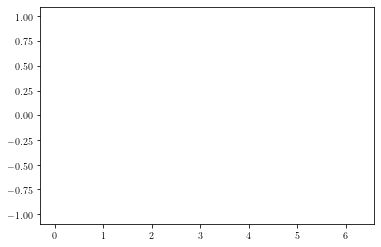

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)


In [20]:
import math, random, copy
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

In [21]:
def randCities(n, h=1, dx=0, dy=0): # nombre de villes, h = côté du carré, dx, dy : décalages en x,y
    return [(h*random.random()+dx, h*random.random()+dy) for i in range(n)]

def randChemin(n): # crée une permutation au hasard de S_n
    l = [i for i in range(n)]
    ll = []
    for i in range(n):
        j = random.randrange(0,len(l))
        ll.append(l[j])
        l.pop(j)
    return ll

def randChemin(n):
    return np.random.permutation(n)


def distance(ptA,ptB): # des listes/tuples de taille 2 pour deux coordonnées
    return math.sqrt( (ptA[0]-ptB[0])**2 + (ptA[1]-ptB[1])**2 )


# distanceMat prend une liste de villes et calcule la matrice des distances une bonne fois pour toutes
def distanceMat(villes): # une liste de villes est une liste de tuples ou une liste de listes de taille 2 (2 coordonnées)
    n = len(villes)
    dist = np.zeros((n,n), dtype='float')
    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = np.inf
            else:
                dist[i][j] = distance(villes[i],villes[j])
    return dist

In [22]:
def entangledToSeparated(l): # liste de coordonnées [[x1,y1],[x2,y2]] ou [(x1,y1),(x2,y2)] --> en [x1,x2],[y1,y2]
    x = []
    y = []
    for j in l:
        x.append(j[0])
        y.append(j[1])
    return x,y

def entangledToSeparated(l): # exactement la même fonction écrite différemment
    p = len(l)
    return [l[i][0] for i in range(p)], [l[i][1] for i in range(p)]

In [23]:
# Entrée: une lise de villes [(x1,y1), (x2,y2)]
# Sortie: * une liste d'entiers entre 0 et n-1 (où n est le nombre de villes), chacun une seule fois
#           l'ordre d'apparition des entiers représente l'ordre de visite des villes
#         * la longueur de la boucle du chemin créé

def nearestNeighbour(villes,M): # M = distanceMat(villes)
    n = len(villes)
    points = [i for i in range(1,n)]
    chemin = [0] # le chemin: la liste ordonnée des n°s de villes
    step = 0
    total_dist = 0
    while(len(points) > 0):
        nearest = points[0] # (i.e. le premier qui vient dans l'ensemble des points à affecter) (1 au début)
        d_min_tmp = M[step][nearest] # [distance minimale temporaire]
        for j in points:
            test_d = M[step][j] # [test_distance] distance testée
            if test_d < d_min_tmp:
                nearest = j
                d_min_tmp = test_d
        total_dist += d_min_tmp
        chemin.append(nearest)
        step = nearest
        points.remove(nearest)
    total_dist += M[0][step]
    return np.asarray(chemin),total_dist

In [24]:
def longueurTour(chemin,M): # en prenant une permutation d'entiers (l'ordre désigne la trajectoire/chemin) et la matrice des distances
    n = len(chemin)
    d = 0
    for i in range(n):
        d += M[chemin[i]][chemin[(i+1)%n]]
    return d # renvoie la longueur de la BOUCLE

def longueurTour2(chemin,villes): # en prenant les villes plutôt que la matrice
    M = distanceMat(villes)
    return longueurTour(chemin,M)

In [25]:
def drawMap(villes, title=None, filename='map.pdf'): # prend en entrée une liste de vcoordonnées (villes) et les place sur le plan
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.scatter(xp,yp, color='red')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title != None:
        plt.rc('text', usetex=True)
        ax.set_title(title)

def affichage(villes, start, title, dist, filename): # avec le départ
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.plot([xp[0],xp[-1]],[yp[0],yp[-1]], marker='o', color = 'blue', markersize = 4)
    ax.plot([xp[0],xp[1]],[yp[0],yp[1]], color='red', marker = 'o', markersize = 4) # on referme: on dessine le dernier segment parcouru en rouge
    ax.plot(xp[1:], yp[1:], marker='o', color = 'blue', markersize = 4) # le tour
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title !=None:
        plt.rc('text', usetex=True)
        ax.set_title(title+ ' d = ' + str(round(dist,5)))

def affichage2(villes, title, dist, filename): # sans le départ
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.plot(xp, yp,'b', linestyle = '-', marker = 'o', markersize = 4, markerfacecolor='black')
    ax.plot([xp[0],xp[-1]],[yp[0],yp[-1]], 'b', linestyle = '-', marker = 'o', markersize = 4, markerfacecolor='black')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title !=None:
        plt.rc('text', usetex=True)
        ax.set_title(title+ ' d = ' + str(round(dist,5)))

def drawPath(villes, chemin, title=None, dist=None, filename=None): # avec le départ
    villes_ordonnees = [villes[i] for i in chemin]
    affichage(villes_ordonnees, villes_ordonnees[0], title, dist, filename)


def drawPath2(villes, chemin, title=None, dist=None, filename=None): # sans le départ
    villes_ordonnees = [villes[i] for i in chemin]
    affichage2(villes_ordonnees, title, dist, filename)

In [121]:
def transposer(chemin,a,b): # ne fait que transposer deux éléments du chemin, ne s'occupe pas de la distance
    elt_tempo = chemin[b]
    chemin[b] = chemin[a]
    chemin[a] = elt_tempo

def echanger(t1,t2,indices,n): # on impose a < b < c < d
    a,b,c,d = indices          # toujours avec b = a+1 et d = c+1 dans notre utilisation
    t2[0:a+1] = t1[0:a+1]
    for i in range(c,b-1,-1):
        t2[c+b-i] = t1[i]
    if d != 0:
        t2[d:n] = t1[d:n]

def variation_distance_permutation(chemin,a,b,M,n): # on impose a < b (sinon ça fait n'importe quoi)
    if (a >= 1 and b <= n-2) or (a == 0 and b <= n-3) or (b == n-1 and a >= 2):
        if a < b-2:
            return M[chemin[a-1]][chemin[b]] + M[chemin[b]][chemin[(a+1)%n]] + M[chemin[b-1]][chemin[a]] + M[chemin[a]][chemin[(b+1)%n]] - M[chemin[a-1]][chemin[a]] - M[chemin[a]][chemin[(a+1)%n]] - M[chemin[b-1]][chemin[b]] - M[chemin[b]][chemin[(b+1)%n]]
        if a >= b-2:
            return M[chemin[a-1]][chemin[b]] + M[chemin[a]][chemin[(b+1)%n]] - M[chemin[a-1]][chemin[a]] - M[chemin[b]][chemin[(b+1)%n]]
    if a == 0 and b == n-1:
        return M[chemin[n-2]][chemin[0]] + M[chemin[n-1]][chemin[1]] - M[chemin[n-2]][chemin[n-1]] - M[chemin[0]][chemin[1]]
    if (a == 0 and b == n-2) or (a == 1 and b == n-1):
        return M[chemin[b-1]][chemin[a]] + M[chemin[b]][chemin[a+1]] - M[chemin[b-1]][chemin[b]] - M[chemin[a]][chemin[a+1]]

def variation_distance_croisement(chemin,t,M):
    a,b,c,d = t
    return M[chemin[a]][chemin[c]] + M[chemin[d]][chemin[b]] - M[chemin[a]][chemin[b]] - M[chemin[c]][chemin[d]]

def variation_distance_insertion(chemin,g,p,M,lc):
    # lc est la taille de la liste chemin, g est l'indice ajouté, p la position d'insertion doit être >= 0
    if p == 0 or p >= lc: # si on veut l'insérer en bout (tout début ou toute fin) de liste
        return M[chemin[0]][g] + M[chemin[-1]][g] - M[chemin[0]][chemin[-1]]
    else:
        return M[chemin[p-1]][g] + M[g][chemin[p]] - M[chemin[p-1]][chemin[p]]


def transposition_aleatoire(M,chemin,n,d,temp,etendue): # transpose peut-être le chemin et renvoir la nouvelle distance pour le SA
    points_a_echanger = random.sample(etendue,2)
    a = min(points_a_echanger)
    b = max(points_a_echanger)
    d_var = variation_distance_permutation(chemin,a,b,M,n)
    p = probaAcceptation(d_var, temp)
    if p > random.random():
        transposer(chemin,a,b)
        return chemin,d+d_var
    return chemin,d

In [125]:
def TSP_SimulatedAnnealing(M,chemin,n,d,m,k):
    if m == 0:
        return chemin, d, None
    chemin = np.asarray(chemin) # on transforme la liste en tableau
    evolution_chemins = np.empty(m+1, dtype=np.ndarray)
    evolution_chemins[0] = chemin
    evolution_distances = np.empty(m+1, dtype=float)
    evolution_distances[0] = d
    etendue = range(n)
    T = k*np.linspace(1,1/m,num = m)
    for i in range(m):
        chemin,d = transposition_aleatoire(M,chemin,n,d,T[i],etendue)
        #print(chemin,d)
        evolution_distances[i+1] = d
        evolution_chemins[i+1] = np.copy(chemin)
    return evolution_chemins, evolution_distances


def probaAcceptation(dvar, temperature):
    if dvar < 0:
        return 1
    else:
        p = np.exp(- dvar / temperature)
        return p

In [120]:
evolution_chemins = np.empty(m+1, dtype=np.ndarray)
evolution_chemins
evolution_chemins[4] = np.array([3,4,5])
evolution_chemins

array([None, None, None, None, array([3, 4, 5]), None, None, None, None,
       None], dtype=object)

In [47]:
m = 9
evolution_distances = np.empty(9, dtype=np.ndarray)
evolution_distances[0] = np.array([1,2,3])

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111])

In [28]:
def echanges_2_opt(M,chemin,dist,n):
    d = dist
    chemin = np.asarray(chemin) # ce n'est pas un pointeur: on transforme la liste en tableau
    t1 = np.copy(chemin)
    t2 = np.copy(chemin)
    i = 0
    while i <= n-3: # de 0 jusqu'à n-3
        j = i+2
        while j <= n-1:
            e,f = i,i+1
            g,h = j,(j+1)%n
            d_var = variation_distance_croisement(t1,(e,f,g,h),M)
            if round(d_var, 15) < 0:
                d += d_var
                # print('echanges_2_opt',l_var,i,j)
                # print(cheminbis)
                # on remplit t2 avec la meilleure solution:
                echanger(t1,t2,(e,f,g,h),n)
                # puis on échange
                gloubi = t1
                t1 = t2
                t2 = gloubi
                # enfin on recommence à 0
                i = 0
                j = 2
            else:
                j += 1
        i += 1
    return t1,d

In [10]:
def permutations_optimales_systematiques(M,chemin,dist,n):
    d = dist
    chemin = np.asarray(chemin) # ce n'est pas un pointeur: on transforme la liste en tableau
    modifs = 1
    while(modifs > 0):
        modifs = 0
        for i in range(n-1):
            for j in range(i+1,n):
                d_var = variation_distance_permutation(chemin,i,j,M,n)
                if d_var < 0:
                    modifs += 1
                    d += d_var
                    transposer(chemin,i,j)
    return chemin,d

In [11]:
def insertion(M,villes,n): # M = distanceMat(villes)
    d_totale = 0
    MD = np.copy(M)
    points = [i for i in range(n)]
    nb_villes_inserees = 0
    chemin = [] # c'est-à-dire les points insérés
    # Select the shortest edge, and make a subtour of it.
    index = np.argmin(M)
    i,j = index//n, index%n # on prend les deux villes qui correspondent à la plus petite distance de la matrice
    d_totale += 2*MD[i][j]
    chemin.append(i)
    chemin.append(j)
    nb_villes_inserees += 2
    points.remove(i)
    points.remove(j)
    # puis on met les distances entre les villes insérées entre ellesà l'infini pour ne pas choisir des villes déjà insérées
    MD[i][j] = np.inf
    MD[j][i] = np.inf
    while nb_villes_inserees < n:
        # Select a city not in the subtour, having the shortest distance to any one of the cities in the subtoor
        index = np.argmin(MD)
        # on fait en sorte que ce soit toujouts j qui soit à insérer et i qui est déjà insérée
        if index//n in chemin:
            i,j = index//n, index%n
        else:
            i,j = index%n, index//n
        # donc à partir de maintenant seul j nous intéresse...
        # on va créer un tableau qui donne la variation en distance (tjrs >= 0 d'après l'inégalité triangulaire) selon la position d'insertion
        variations = np.empty(nb_villes_inserees+1, dtype=float)
        for k in range(0,nb_villes_inserees+1):
            variations[k] = variation_distance_insertion(chemin, j, k, M, nb_villes_inserees)
        # Find an edge in the subtour such that the cost of inserting the selected city between the edge’s cities will be minimal.
        indice_insertion = np.argmin(variations)
        chemin.insert(indice_insertion, j)
        nb_villes_inserees += 1
        d_totale += variations[indice_insertion]
        points.remove(j)
        # puis on met les distances entre les villes insérées entre elles à l'infini
        for k in range(nb_villes_inserees):
                MD[j][chemin[k]] = np.inf
                MD[chemin[k]][j] = np.inf
    return np.asarray(chemin), d_totale

Chemin aléatoire 50.6867305487967


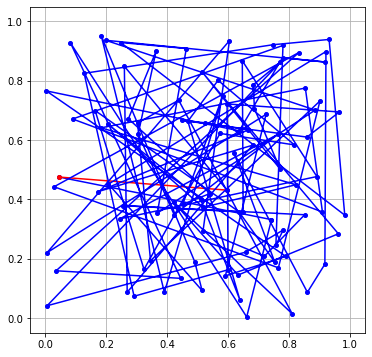

In [14]:
n = 100
# random.seed(10)
villes = randCities(n)
M = distanceMat(villes)


# print('Carte:')
# drawMap(villes)


# on génère un chemin complètement aléatoire
c_rd = randChemin(n)
d_rd = longueurTour(c_rd,M)
print('Chemin aléatoire', d_rd)

drawPath(villes,c_rd)

0.0 0.01760578155517578


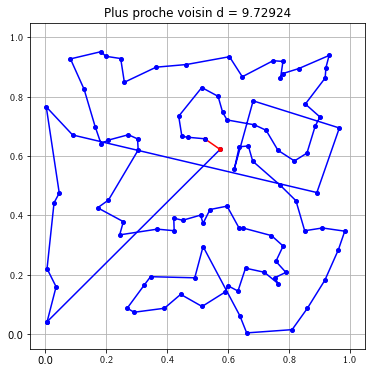

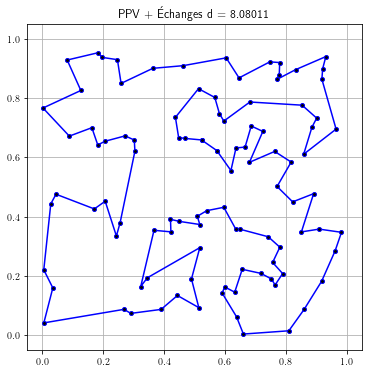

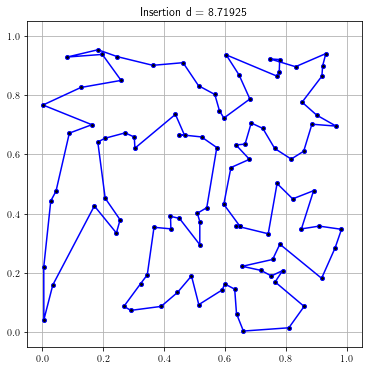

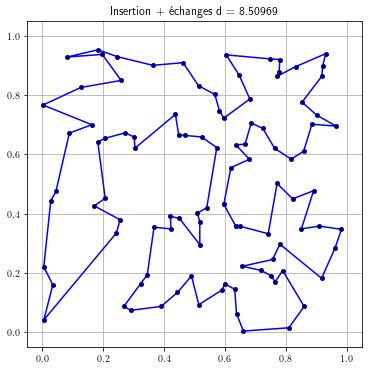

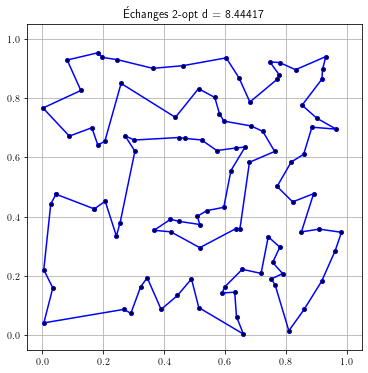

In [15]:
# =============================================================================
# MÉTHODE DU PLUS PROCHE VOISIN
tempsvoisin1 = time.time()
c_nn, d_nn = nearestNeighbour(villes,M)
tempsvoisin2 = time.time()

#print('Plus proche voisin', d_nn)
drawPath(villes,c_nn, 'Plus proche voisin', d_nn, 'ppv0.pdf')

# ========     + échanges
c_nn_ech, d_nn_ech = echanges_2_opt(M, c_nn, d_nn, n)

#print('PPV + Échanges', d_nn_ech)
drawPath2(villes,c_nn_ech, 'PPV + Échanges', d_nn_ech, 'ppv+echanges0.pdf')




# =============================================================================
#                ** MÉTHODE PAR INSERTION **

tempsinsertion1 = time.time()
c_ins, d_ins = insertion(M, villes, n)
tempsinsertion2 = time.time()
#print('Insertion', d_ins)
drawPath2(villes, c_ins, 'Insertion', d_ins, 'insertion0.pdf')

# ========     + échanges
c_ins_ech, d_ins_ech = echanges_2_opt(M, c_ins, d_ins, n)

#print('Insertion + échanges', d_ins_ech)
drawPath2(villes,c_ins_ech, 'Insertion + échanges', d_ins_ech, 'insertion+echanges0.pdf')


# =============================================================================
#                   ** MÉTHODE 2-OPT **
c_ech, d_ech = echanges_2_opt(M, c_rd, d_rd, n)
    
#print('Échanges 2-opt', d_ech)
drawPath2(villes,c_ech, 'Échanges 2-opt', d_ech, 'echanges2opt0.pdf')




print(tempsvoisin2 - tempsvoisin1, tempsinsertion2 - tempsinsertion1)

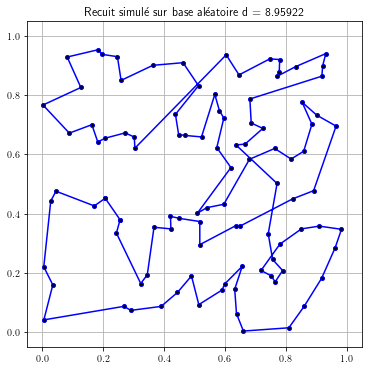

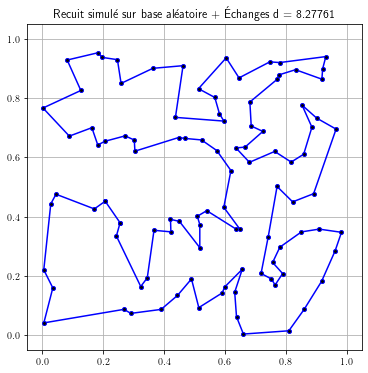

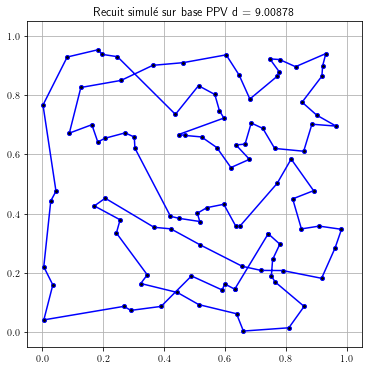

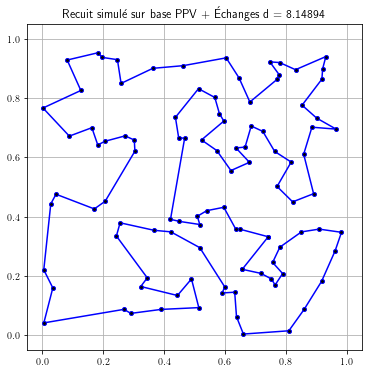

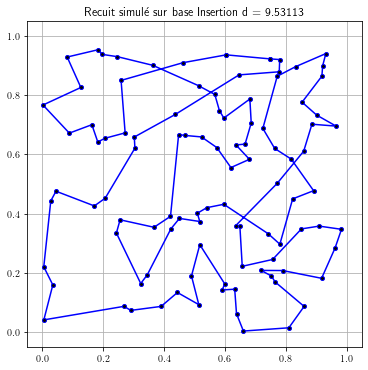

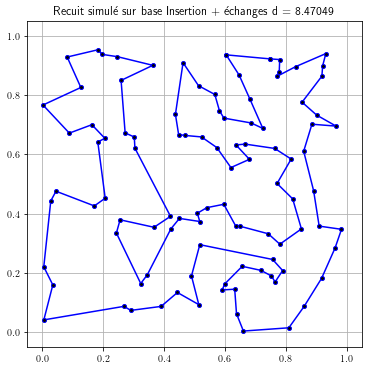

In [16]:
p = 1000000
k = 0.2 # k grand : plus souple; k petit: + rigide

# =============================================================================
#          ** RECUIT SIMULÉ SUR BASE ALÉATOIRE **

c_sa_rd,d_sa_rd,evol_sa_rd = TSP_SimulatedAnnealing(M,c_rd,n,d_rd,p,k)

#print('Méthode du recuit simulé sur base aléatoire', lrd)
drawPath2(villes,c_sa_rd, 'Recuit simulé sur base aléatoire', d_sa_rd, 'sa_rd.pdf')


# ========     + échanges
c_sa_rd_ech, d_sa_rd_ech = echanges_2_opt(M, c_sa_rd, d_sa_rd, n)

#print('PPV + Échanges', d_nn_ech)
drawPath2(villes,c_sa_rd_ech, 'Recuit simulé sur base aléatoire + Échanges', d_sa_rd_ech, 'sa_rd+echanges.pdf')



# =============================================================================
#          ** RECUIT SIMULÉ SUR BASE "PPV" / "NN" **
c_sa_nn, d_sa_nn, evol_sa_nn = TSP_SimulatedAnnealing(M,c_nn,n,d_nn,p,k)

#print('Recuit simulé sur base PPV', d_sa_nn)
drawPath2(villes,c_sa_nn, 'Recuit simulé sur base PPV', d_sa_nn, 'sa_ppv0.pdf')

    

# ========     + échanges
c_sa_nn_ech, d_sa_nn_ech = echanges_2_opt(M, c_sa_nn, d_sa_nn, n)

#print('Recuit simulé sur base PPV + Échanges', d_sa_nn_ech)
drawPath2(villes,c_sa_nn_ech, 'Recuit simulé sur base PPV + Échanges', d_sa_nn_ech, 'sa_ppv_ech.pdf')





# ==============================================================================
#      ** RECUIT SIMULÉ SUR BASE "Insertion" **
c_sa_ins, d_sa_ins, evol_sa_ins = TSP_SimulatedAnnealing(M,c_ins,n,d_ins,p,k)

#print('Recuit simulé sur base Insertion', d_sa_ins)
drawPath2(villes,c_sa_ins, 'Recuit simulé sur base Insertion', d_sa_ins, 'sa_ins.pdf')

# ========     + échanges
c_sa_ins_ech, d_sa_ins_ech = echanges_2_opt(M, c_sa_ins, d_sa_ins, n)

#print('Recuit simulé sur base Insertion + échanges', d_sa_ins_ech)
drawPath2(villes,c_sa_ins_ech, 'Recuit simulé sur base Insertion + échanges', d_sa_ins_ech, 'sa_ins+echanges.pdf')

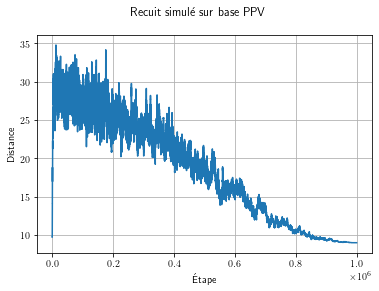

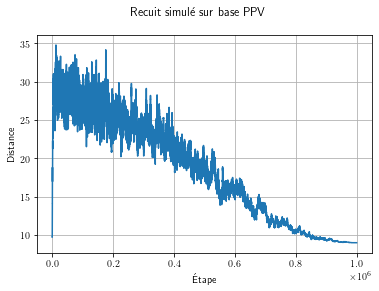

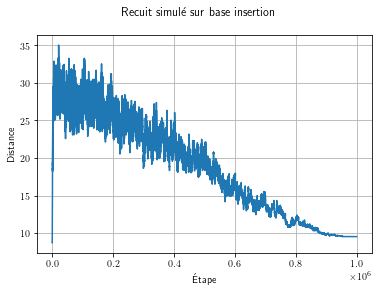

In [17]:
# tracer les graphes d'évolution de la distance
plt.plot(evol_sa_nn)
plt.suptitle('Recuit simulé sur base PPV')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
#plt.savefig('evol_sa_rd.pdf')
plt.show()

plt.plot(evol_sa_nn)
plt.suptitle('Recuit simulé sur base PPV')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
#plt.savefig('evol_sa_nn.pdf')
plt.show()


plt.plot(evol_sa_ins)
plt.suptitle('Recuit simulé sur base insertion')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
#plt.savefig('evol_sa_ins.pdf')
plt.show()

Chemin aléatoire 12.231555043505269
Méthode du recuit simulé sur base aléatoire à 25 points


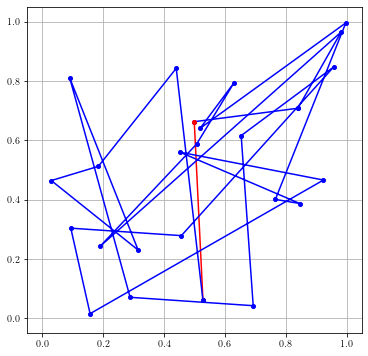

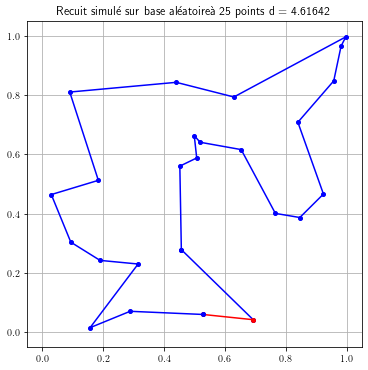

In [174]:
#          ** RECUIT SIMULÉ SUR BASE ALÉATOIRE **

n = 25 # nombre de villes
random.seed(11)
villes = randCities(n)
M = distanceMat(villes)

# on génère un chemin complètement aléatoire
c_rd = randChemin(n)
d_rd = longueurTour(c_rd,M)
print('Chemin aléatoire', d_rd)

drawPath(villes,c_rd)


p = 20000 # nombre d'étapes du recuit simulé
k = 0.2 # k grand : plus souple; k petit: + rigide


evol_c_sa_rd,evol_d_sa_rd = TSP_SimulatedAnnealing(M,c_rd,n,d_rd,p,k)

print('Méthode du recuit simulé sur base aléatoire à '+str(n)+' points')
drawPath(villes,evol_c_sa_rd[-1], 'Recuit simulé sur base aléatoireà '+str(n)+' points', evol_d_sa_rd[-1], 'sa_rd.pdf')

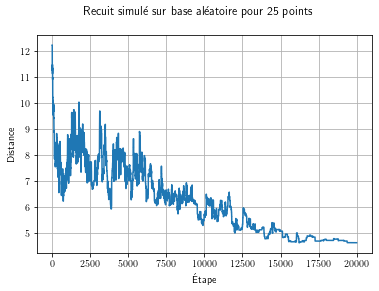

In [179]:
plt.plot(evol_d_sa_rd)
plt.suptitle('Recuit simulé sur base aléatoire pour '+str(n)+' points')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
plt.savefig('sa_rd_n'+str(n)+'e'+str(p)+'.pdf')
plt.show()

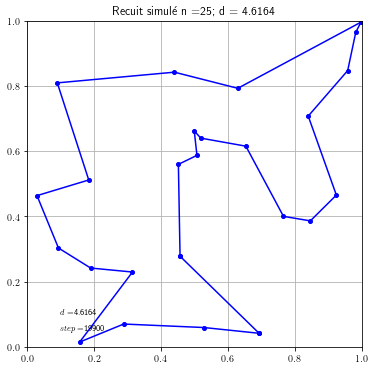

In [181]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter



# initialisation de la figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, facecolor='#FFFFFF')
ax.grid(True)
ax.set_title('Recuit simulé n =' + str(n) + '; d = ' + str(round(evol_d_sa_rd[0],4)))

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])

# initialisation des tracés et du texte
villes_ordonnees = [villes[j] for j in evol_c_sa_rd[0]]
xp,yp = entangledToSeparated(villes_ordonnees)


line1, = ax.plot([xp[0],xp[-1]],[yp[0],yp[-1]], marker='o', color = 'blue', markersize = 4)
line2, = ax.plot(xp[:], yp[:], marker='o', color = 'blue', markersize = 4)
disttxt = ax.text(.1,.1, '', fontsize=8)
steptext = ax.text(.1,.05, '', fontsize=8)


def init():  # only required for blitting to give a clean slate.
    line1.set_xdata([np.nan,np.nan])
    line1.set_ydata([np.nan,np.nan])
    line2.set_xdata([np.nan]*len(xp))
    line2.set_ydata([np.nan]*len(yp))
    disttxt.set_text('')
    steptext.set_text('')
    return line1,line2,time_text,steptext
    

r = 100
    
def animate(i):
    villes_ordonnees = [villes[j] for j in evol_c_sa_rd[r*i]]
    xp,yp = entangledToSeparated(villes_ordonnees)
    line1.set_xdata([xp[0],xp[-1]])
    line1.set_ydata([yp[0],yp[-1]])
    line2.set_xdata(xp[:])
    line2.set_ydata(yp[:])
    disttxt.set_text('$d=$'+str(round(evol_d_sa_rd[r*i],4)))
    steptext.set_text('$step=$'+str(r*i))    
    ax.set_title('Recuit simulé n =' + str(n) + '; d = ' + str(round(evol_d_sa_rd[r*i],4)))
    return line1,line2,disttxt,steptext


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=33, blit=True, frames=int(p/r))


writer = FFMpegWriter(bitrate=1500, fps=30, extra_args=['-s', '480x360', '-vcodec', 'libx264'])
ani.save('sa_rd_n'+str(n)+'e'+str(p)+'.mp4', writer=writer)
HTML(ani.to_html5_video())